In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1017.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/4803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/5106.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3765.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/780.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/227.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/2731.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/579.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/353.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/Wi

In [74]:
import os
import pandas as pd
from PIL import Image
from PIL import Image

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import DenseNet201

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

main_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset'
# Define the paths to the train, test, and validation folders
train_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'



train_WithMask_dir = os.path.join(train_dir, 'WithMask')
train_WithoutMask_dir = os.path.join(train_dir, 'WithoutMask')

val_WithMask_dir = os.path.join(val_dir, 'WithMask')
val_WithoutMask_dir = os.path.join(val_dir, 'WithoutMask')

test_WithMask_dir = os.path.join(test_dir, 'WithMask')
test_WithoutMask_dir = os.path.join(test_dir, 'WithoutMask')

In [75]:
os.listdir(train_WithMask_dir)[:10]

['Augmented_850_3888270.png',
 'Augmented_348_5679704.png',
 'Augmented_684_3026577.png',
 'Augmented_640_6283500.png',
 'Augmented_290_2810702.png',
 'Augmented_272_1257404.png',
 'Augmented_680_2431803.png',
 'Augmented_79_948721.png',
 '1231.png',
 'Augmented_436_2899816.png']

In [76]:
for dir, dirname, filename in os.walk(main_dir):
  print(f"Found {len(dirname)} directories and {len(filename)} images in {dir}")

Found 3 directories and 0 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset
Found 2 directories and 0 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation
Found 0 directories and 400 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask
Found 0 directories and 400 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask
Found 2 directories and 0 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test
Found 0 directories and 509 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask
Found 0 directories and 483 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask
Found 2 directories and 0 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train
Found 0 directories and 5000 images in /kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask
Fo

In [87]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale the image to values between 0 and 1

train_gen = ImageDataGenerator(rescale=1/255.0)
val_gen = ImageDataGenerator(rescale=1/255.0)
test_gen = ImageDataGenerator(rescale=1/255.0)

batch_size = 64
image_size = (256,256)

train_data = train_gen.flow_from_directory(train_dir, 
                                           batch_size=200,
                                           class_mode='categorical',
                                             color_mode= 'rgb',
                                           target_size=image_size)

val_data = val_gen.flow_from_directory(val_dir, 
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           color_mode= 'rgb',
                                           target_size=image_size)

test_data = val_gen.flow_from_directory(test_dir, 
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                          color_mode= 'rgb',
                                           target_size=image_size)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [88]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

data_for_viz = tf.keras.preprocessing.image_dataset_from_directory(
    
          train_dir,
          image_size=(180,180))

Found 10000 files belonging to 2 classes.


In [89]:
def image_viz(dataset):
  
  plt.figure(figsize=(12, 8))
  
  index = 0
  for image, label in dataset.take(12):
    
    index +=1
    ax = plt.subplot(4, 4, index)
    plt.imshow(image[index].numpy().astype("uint8"))
    plt.title(int(label[index]))
    plt.axis("off")

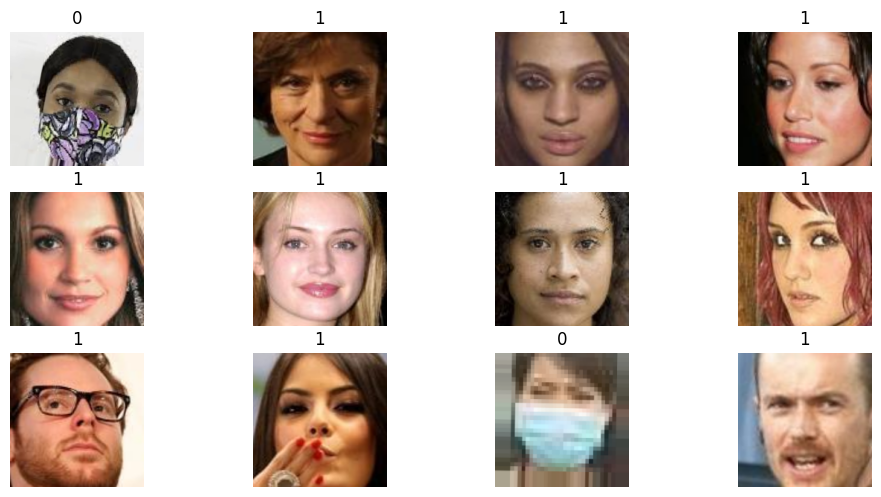

In [90]:
image_viz(data_for_viz)

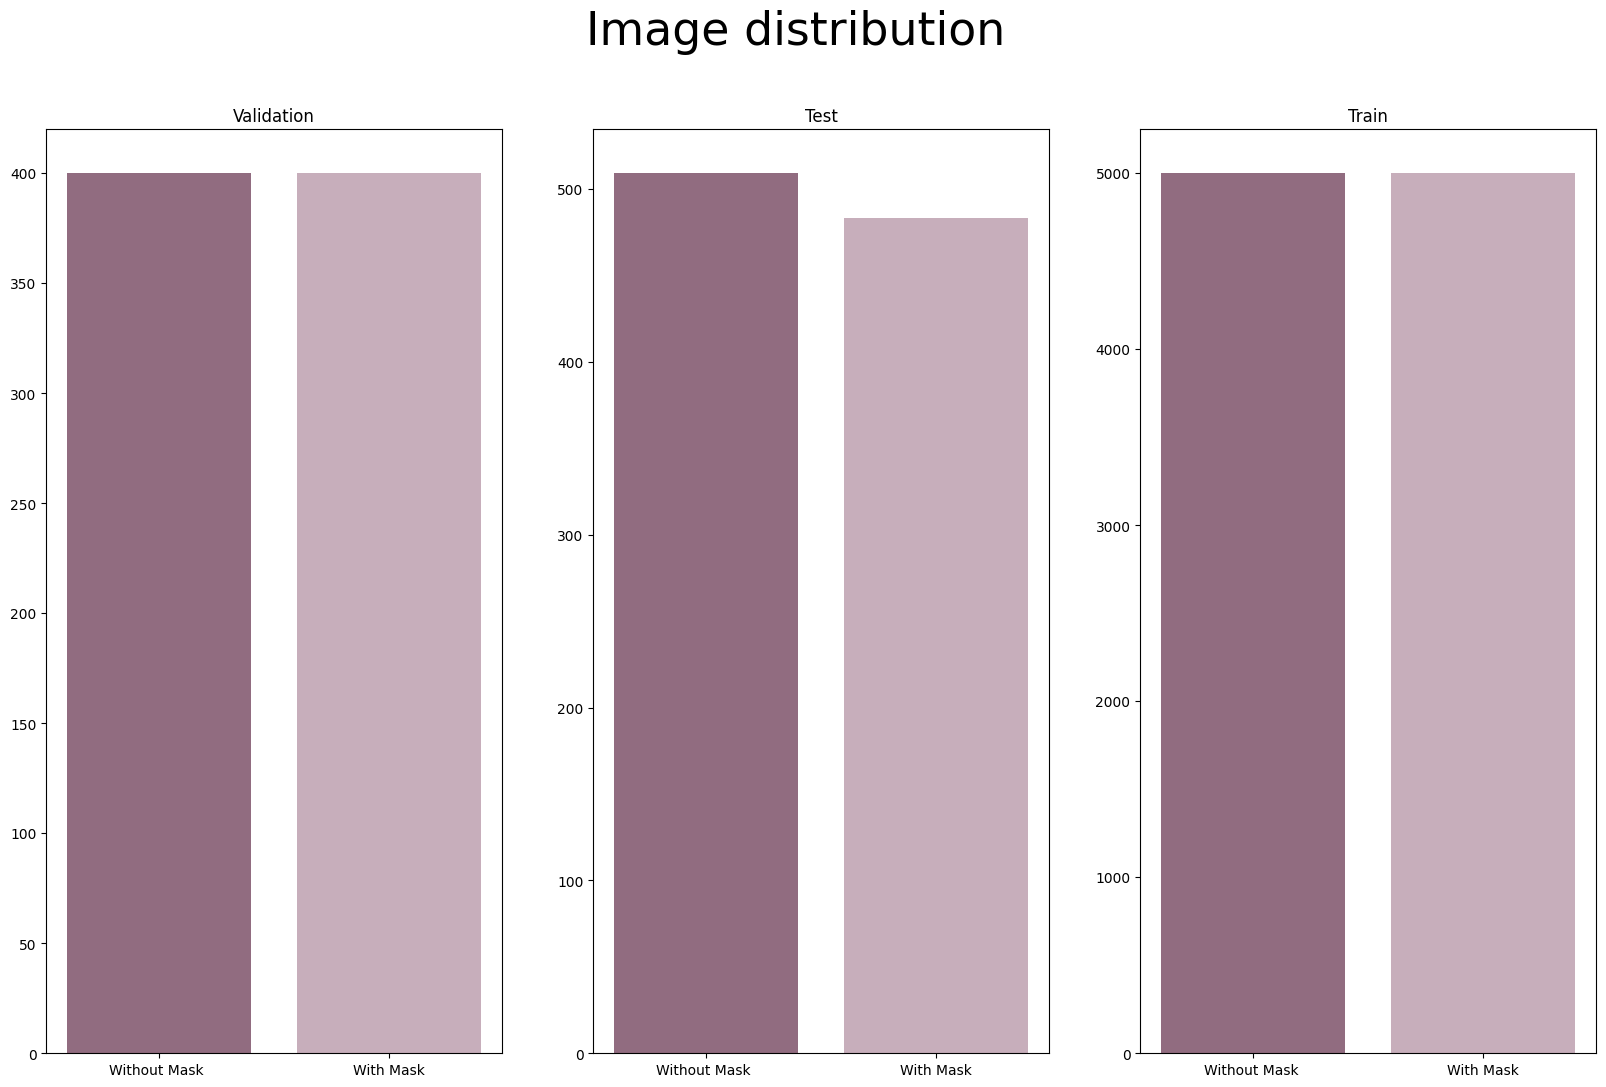

In [91]:
CLASSES = ['Without Mask ','With Mask']

fig, axes = plt.subplots(1, 3, figsize=(20, 12))

for set_ in os.listdir(main_dir):
    total = []
    ax = axes[os.listdir(main_dir).index(set_)]
    for class_ in os.listdir(main_dir+'/'+set_):
        count=len(os.listdir(main_dir+'/'+set_+'/'+class_))
        total.append(count)
    ax.bar(CLASSES, total, color=['#916c80','#c7aebb'])
    ax.set_title(set_)
plt.suptitle('Image distribution', size=33)
plt.show()

In [92]:
resnet101v2 = ResNet101V2(weights='imagenet',include_top=False,input_shape=(256,256,3))

for layer in resnet101v2.layers:
    layer.trainable = False

In [93]:
model = Sequential()
model.add(resnet101v2)

model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 8, 8, 2048)        42626560  
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dense_12 (Dense)            (None, 2)                 262146    
                                                                 
Total params: 42,888,706
Trainable params: 262,146
Non-trainable params: 42,626,560
_________________________________________________________________


In [94]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [95]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.00001,
    patience=3,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
    )

In [96]:
resnet_history = model.fit(train_data,
                        validation_data=val_data,
                        epochs=1,
                        verbose=1,
                        callbacks=callback)

50/50 [==============================] - 2387s 48s/step - loss: 0.1190 - accuracy: 0.9918 - val_loss: 0.0790 - val_accuracy: 0.9962


In [97]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 210s 13s/step - loss: 0.0480 - accuracy: 0.9980
Test Loss: 0.04801609367132187
Test Accuracy: 0.9979838728904724


1/1 [==============================] - 6s 6s/step


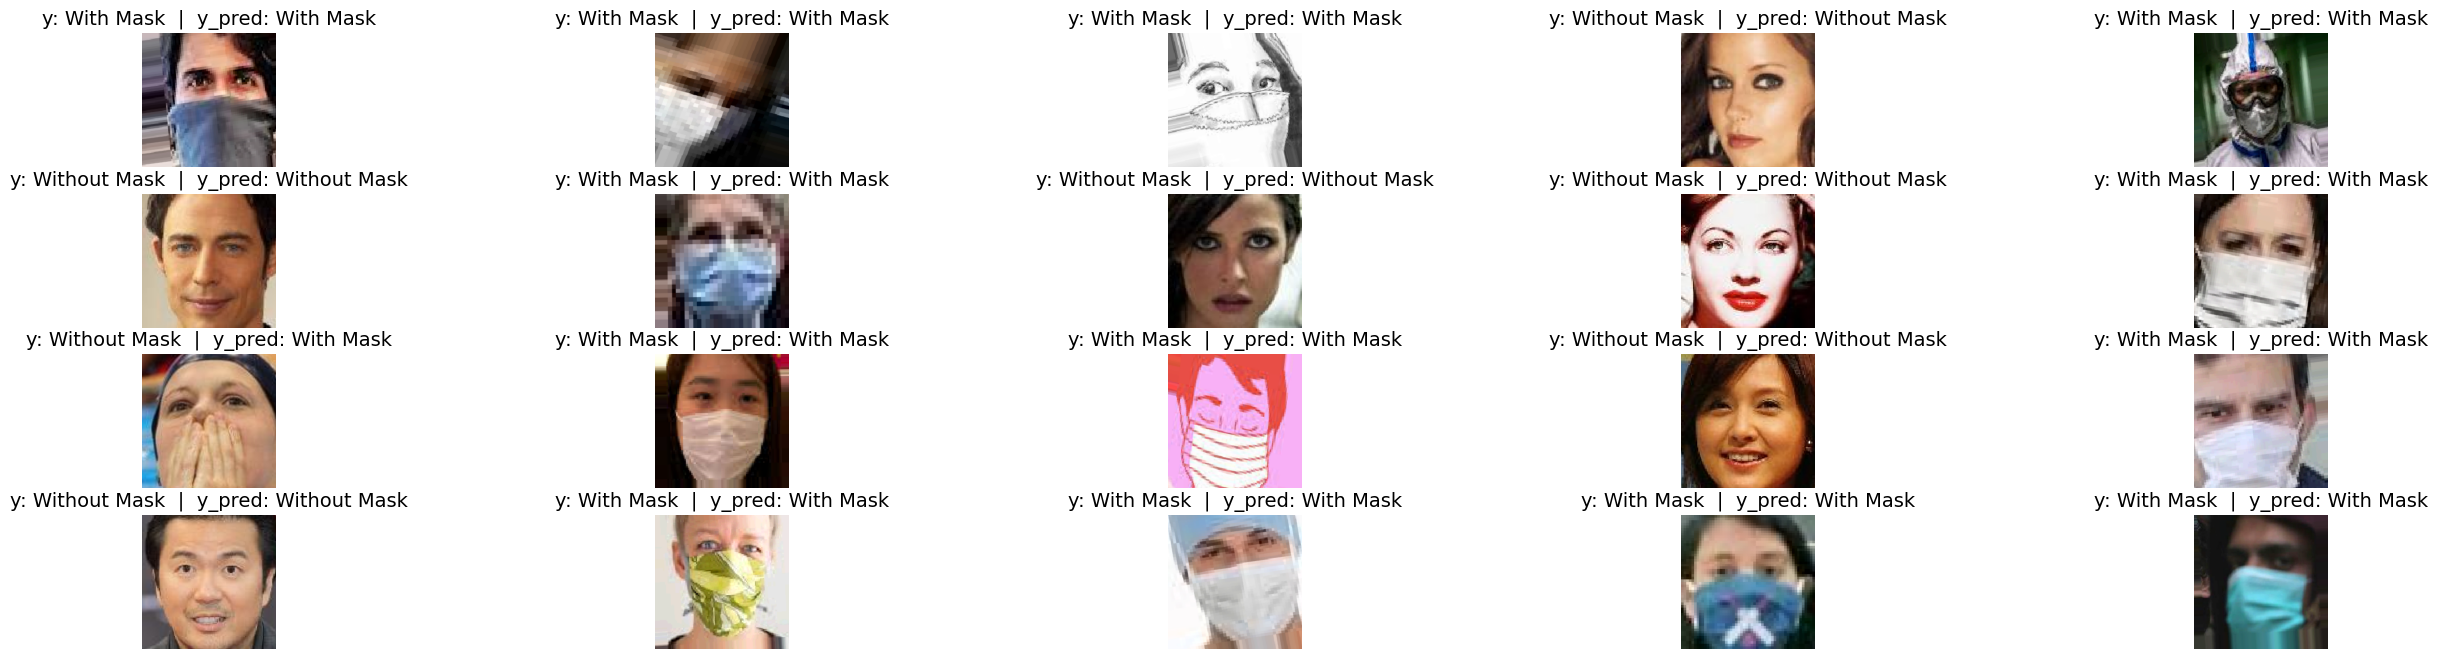

In [99]:
image, label = test_data.next()
num_imgs = 20
lab_names = ['With Mask', 'Without Mask']
images = image[0:num_imgs, :, :, :]
labels = label[0:num_imgs]
predict = np.round(model.predict(images))

image_rows = 4
image_col = int(num_imgs / image_rows)

_, axs = plt.subplots(image_rows, image_col, figsize=(32, 8))
axs = axs.flatten()

for i in range(num_imgs):
    img = images[i]
    lab = labels[i]
    axs[i].imshow(img)
    pred = predict[i]
    axs[i].axis('off')
    lab, pred = np.argmax(lab), np.argmax(pred)
    axs[i].set_title(label=f'y: {lab_names[lab]}  |  y_pred: {lab_names[pred]}', fontsize=14)

plt.show()


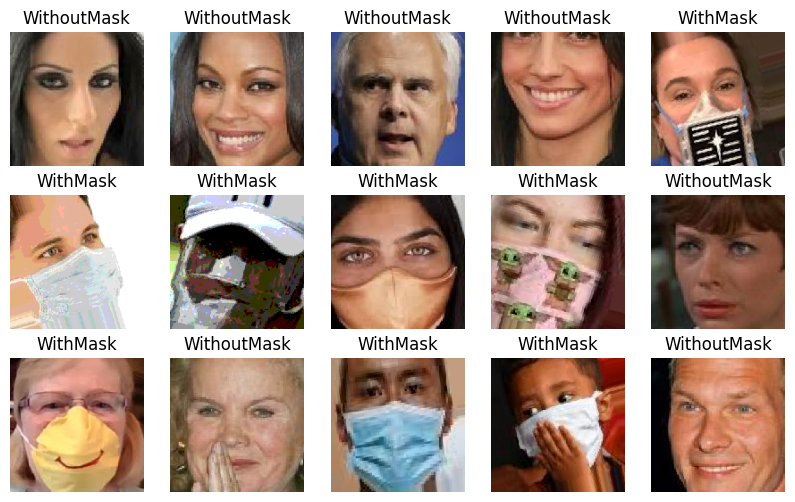

In [175]:
data_test = image_dataset_from_directory(test_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=True)
classes_train = data_train.class_names
plt.figure(figsize=(10,6))
for img, label in data_train.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(classes_train[int(label[i])])
        plt.axis('off')

clear_output()

In [156]:
def img_preprocessing(path):
    sample_mask_img = cv2.imread(path)
    sample_mask_img = cv2.resize(sample_mask_img, (256, 256))
    
    # Display the image
    plt.imshow(cv2.cvtColor(sample_mask_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    sample_mask_img = np.reshape(sample_mask_img, [1, 256, 256, 3])
    sample_mask_img = sample_mask_img / 255.0
    res = np.argmax(model.predict(sample_mask_img))
    print('            ', colored(lab_names[res], "green"))

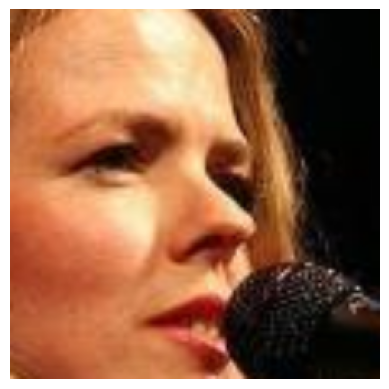

1/1 [==============================] - 0s 257ms/step
             Without Mask


In [162]:
img_preprocessing('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1215.png')

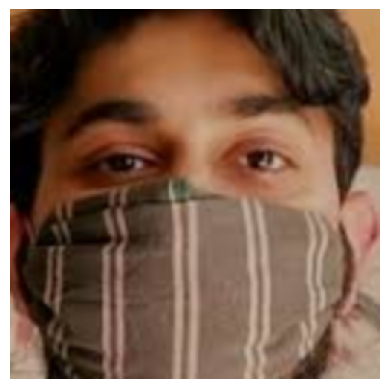

1/1 [==============================] - 0s 263ms/step
             With Mask


In [172]:
img_preprocessing('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1175.png')